In [1]:
from google.colab import files
files.upload()
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!chmod 600 /content/kaggle.json
!kaggle datasets download -d medahmedkrichen/devanagari-handwritten-character-datase

Saving kaggle.json to kaggle (3).json
 92% 70.0M/76.1M [00:00<00:00, 128MB/s]
100% 76.1M/76.1M [00:00<00:00, 119MB/s]


In [2]:
!unzip *.zip
!rm *.zip

Archive:  devanagari-handwritten-character-datase.zip
replace DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10551.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop

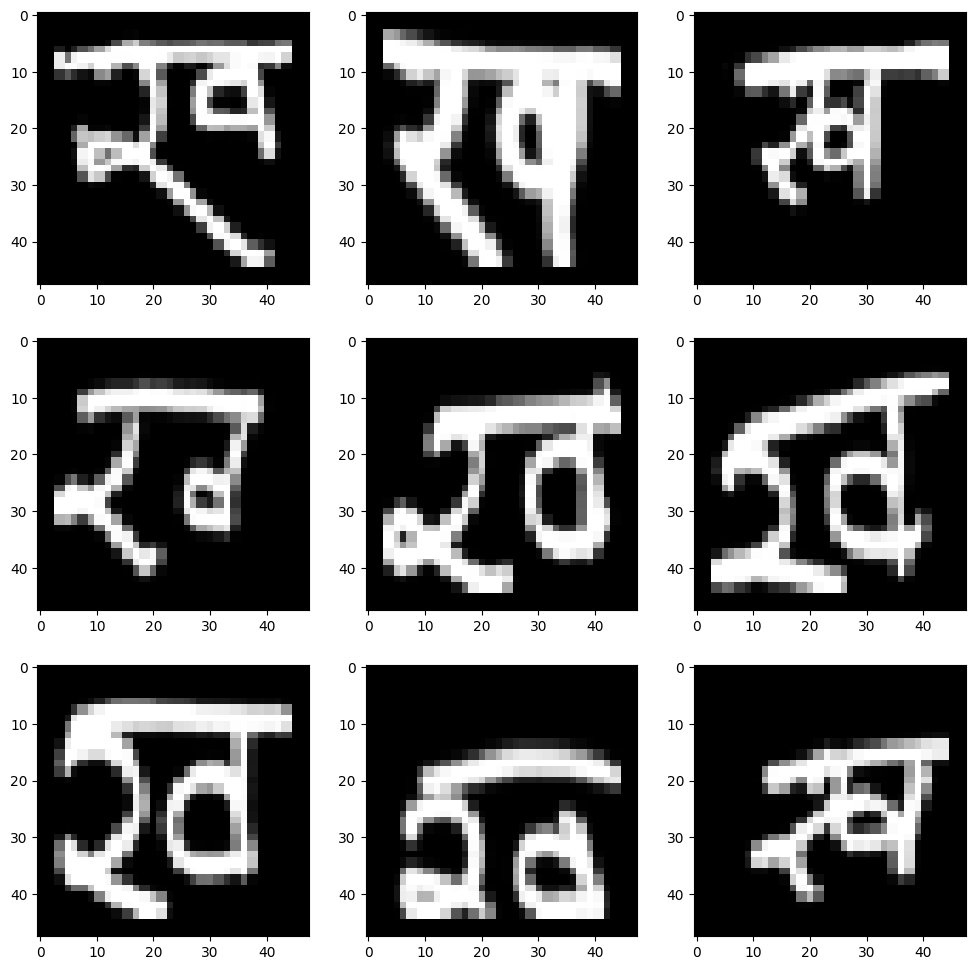

In [4]:
p_size=48
folder_path="/content/DevanagariHandwrittenCharacterDataset/"
expression='character_2_kha'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
  plt.subplot(3,3,i)
  img=keras.preprocessing.image.load_img(folder_path+"Train/"+expression+"/"+os.listdir(folder_path+"Train/"+expression)[i+10],target_size=(p_size,p_size))
  plt.imshow(img)
plt.show()

In [5]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()
train_set=datagen_train.flow_from_directory(folder_path+"Train",
                                            target_size=(p_size,p_size),
                                            color_mode="grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"Test",
                                            target_size=(p_size,p_size),
                                            color_mode="grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [6]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
image_height, image_width = 48, 48
num_classes = 46  # Assuming 46 classes for Hindi characters

# Load pre-trained VGG16 model without the fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the path to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
    folder_path + "Train",
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    folder_path + "Test",  # Adjust this path to your validation dataset
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

# Train the model with validation data
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

58889256/58889256 [==============================] - 0s 0us/step
Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.
Epoch 1/10


KeyboardInterrupt: ignored

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
# model.save("/content/gdrive/My Drive/Colab_Models/VGG_CharacterRecog.h5")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
image_height, image_width = 75, 75
num_classes = 46

# Load pre-trained InceptionV3 model without the fully connected layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze convolutional layers
for layer in inception_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(inception_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the path to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
    folder_path + "Train",
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    folder_path + "Test",  # Adjust this path to your validation dataset
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

# Train the model with validation data
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)
# model.save("/content/gdrive/My Drive/Colab_Models/IV5_CharacterRecog.h5")
# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_height, image_width = 75, 75
num_classes = 46

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in resnet_base.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the paths to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
    folder_path + "Train",
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    folder_path + "Test",
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

# Train the model with validation data
history=model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)
model.save("/content/gdrive/My Drive/Colab_Models/RS50V1_CharacterRecog.h5")
# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_height, image_width = 75, 75
num_classes = 46

densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in densenet_base.layers:
  layer.trainable = False

model = Sequential()
model.add(densenet_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the paths to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
  folder_path + "Train",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
  folder_path + "Test",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

# Train the model with validation data
history=model.fit(
  train_generator,
  epochs=10,
  steps_per_epoch=train_generator.samples // train_generator.batch_size,
  validation_data=val_generator,
  validation_steps=val_generator.samples // val_generator.batch_size
)
model.save("/content/gdrive/My Drive/Colab_Models/DN_CharacterRecog.h5")
# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_height, image_width = 75, 75
num_classes = 46

mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in mobilenet_base.layers:
  layer.trainable = False

model = Sequential()
model.add(mobilenet_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the paths to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
  folder_path + "Train",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
  folder_path + "Test",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

# Train the model with validation data
history=model.fit(
  train_generator,
  epochs=10,
  steps_per_epoch=train_generator.samples // train_generator.batch_size,
  validation_data=val_generator,
  validation_steps=val_generator.samples // val_generator.batch_size
)
model.save("/content/gdrive/My Drive/Colab_Models/MV2_CharacterRecog.keras")

# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.
Epoch 1/10
 856/2443 [=========>....................] - ETA: 7:16 - loss: 3.6350 - accuracy: 0.0968

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_height, image_width = 75, 75
num_classes = 46

resnet_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

for layer in resnet_base.layers:
  layer.trainable = False

model = Sequential()
model.add(resnet_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

# Data augmentation and preprocessing for validation (Note: Validation data shouldn't be augmented)
val_datagen = ImageDataGenerator(rescale=1./255)

# Provide the paths to your datasets of Hindi characters for training and validation
train_generator = train_datagen.flow_from_directory(
  folder_path + "Train",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
  folder_path + "Test",
  target_size=(image_height, image_width),
  batch_size=32,
  class_mode='categorical'
)

# Train the model with validation data
history=model.fit(
  train_generator,
  epochs=10,
  steps_per_epoch=train_generator.samples // train_generator.batch_size,
  validation_data=val_generator,
  validation_steps=val_generator.samples // val_generator.batch_size
)
model.save("/content/gdrive/My Drive/Colab_Models/RSV2_CharacterRecog.keras")
# Visualizing training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()